In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Activation
#from tensorflow.keras.utils.generic_utils import get_custom_objects
from tensorflow.keras import backend as K


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

(100, 801, 3)
(80000, 3)
(80000, 3)


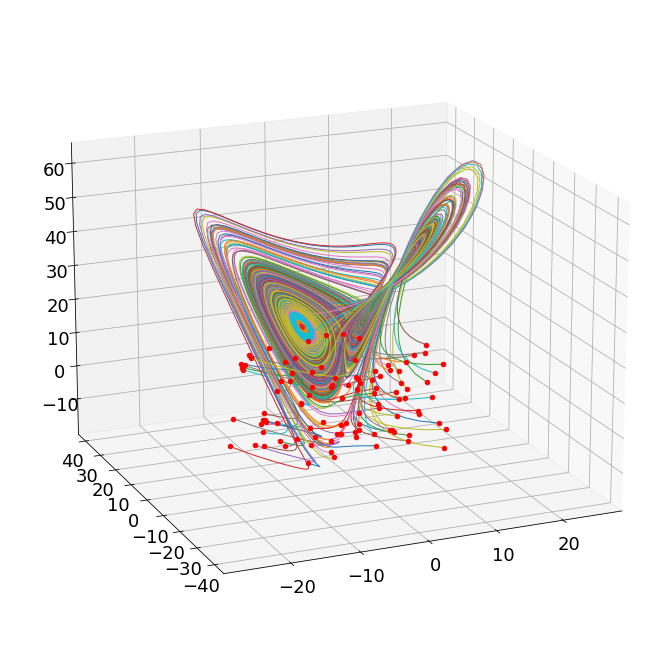

In [17]:
## Simulate the Lorenz System

dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28


nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

print(str(x_t.shape))

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')

print(str(nn_input.shape))
print(str(nn_output.shape))

             
ax.view_init(18, -113)
plt.show()

In [27]:
## Neural Net

# Define activation functions
def logsig(x):
    return K.variable(np.divide(1,(1+np.exp(-K.eval(x)))))

def radbas(x):
    return K.variable(np.exp(-np.power(K.eval(x),2)))

def purelin(x):
    return x


#create model
model = Sequential()

#add model layers
model.add(Dense(20, activation=logsig))
model.add(Dense(20, activation=radbas))
model.add(Dense(20, activation=purelin))
model.add(Dense(3, activation=logsig))


sgd_optimizer = optimizers.SGD(momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', run_eagerly=True)
model.fit(nn_input, nn_output, epochs=30)

Epoch 1/30


ValueError: No gradients provided for any variable: ['dense_50/kernel:0', 'dense_50/bias:0', 'sequential_17/dense_51/kernel:0', 'sequential_17/dense_51/bias:0', 'sequential_17/dense_52/kernel:0', 'sequential_17/dense_52/bias:0', 'sequential_17/dense_53/kernel:0', 'sequential_17/dense_53/bias:0'].

In [21]:
nn_input.shape

np.random.seed(123)
x0Test = -15 + 30 * np.random.random((100, 3))
YPredict = np.argmax(model.predict(x0Test),axis=1)
# argmax reverses the one-hot encoding scheme

ax.plot(x, y, z,linewidth=1)
ax.scatter(YPredict[:,0],YPredict[:,1],YPredict[:,2],color='r')

             
ax.view_init(18, -113)
plt.show()

#accuracy = np.sum(YPredict == y_test_label)/len(y_test_label)
print('Accuracy = {}'.format(accuracy))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed